<a href="https://colab.research.google.com/github/PatriciaBonert/data-scientist/blob/master/Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aluguel de bicicletas

<p align=center>
<img src="https://www.economist.com/img/b/1280/720/85/sites/default/files/20170930_BLP508.jpg" width="50%"></p>

Os serviços de bicicletas compartilhadas se tornaram uma opção indispensável de mobilidade urbana tanto quanto quaisquer outros meios de transporte. A bicicleta se tornou uma grande aposta como meio para atender às necessidades de transporte nas áreas urbanas e os programas de compartilhamento, públicos ou privados, mudam a maneira como enxergamos as bikes: de opção de lazer a meio de transporte e até mesmo instrumento de trabalho.

###Objetivo

A partir de dados fornecidos pela [UCI](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset), será realizado um **estudo descritivo e correlativo** para gerar informações, além de um estudo preditivo com machine learning aplicando um modelo de Regressão Linear.

Para melhor entendimento, a fonte disponibilizou previamente a legenda das váriaveis analisadas nesse dataset, e a partir dela foram feitas as devidas classificações:




In [2]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving tab1.jpg to tab1.jpg
Saving tab2.jpg to tab2.jpg


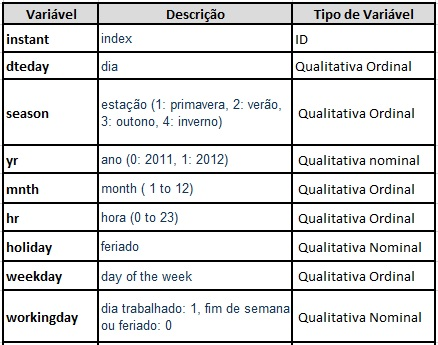

In [5]:
Image("tab1.jpg")

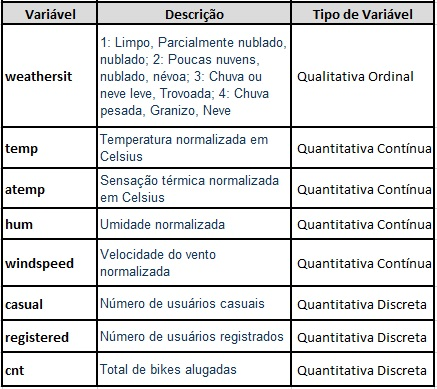

In [6]:
Image("tab2.jpg")


A partir da classificação das variáveis, podemor verificar se elas foram classificadas corretamente para o tratamento dos dados.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ignore warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
% matplotlib inline

In [9]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/My Drive/bike.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# data volume
print("Volume de dados:\t {}".format(df.shape))
#verify classification
display(df.dtypes)

Volume de dados:	 (731, 16)


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Como as variáveis estão categorizadas corretamente de acordo com a tabela acima, pode-se prosseguir com as análises.

###Análises qualitativas

Conforme os dados extraídos abaixo, é possível inferir as seguintes informações:

*   A quantidade de aluguéis é maior em dias de sol ou nublados, com 63% de incidência durante o ano;
*   As bicicletas são mais alugadas em dias de trabalho.



In [12]:
(df.weathersit.value_counts() / df.shape[0])*100

1    63.337893
2    33.789330
3     2.872777
Name: weathersit, dtype: float64

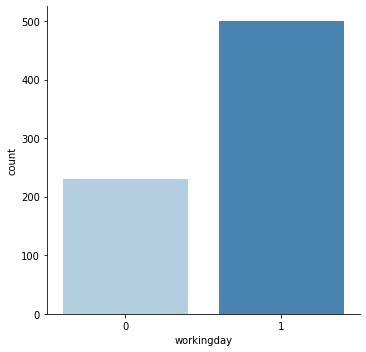

In [16]:
df.workingday.value_counts()
sns.factorplot(x='workingday', data=df, kind='count', palette='Blues');

###Verificando outliers

Afim de identificar se esse dataset é balanceado, analizaremos boxplots das variáveis contínuas e das discretas, além de histogramas das contínuas.

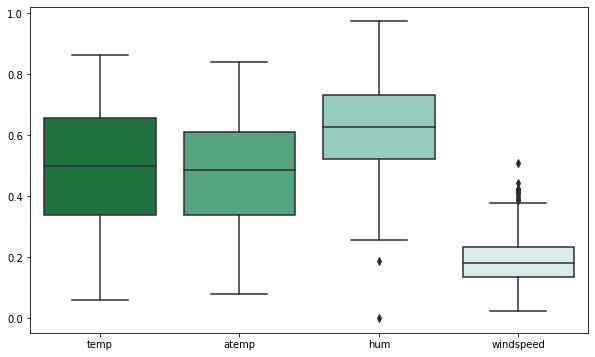

In [17]:
#boxplot
sns.boxplot(data=df[['temp', 'atemp', 'hum', 'windspeed']], palette='BuGn_r')
fig=plt.gcf()
fig.set_size_inches(10,6)



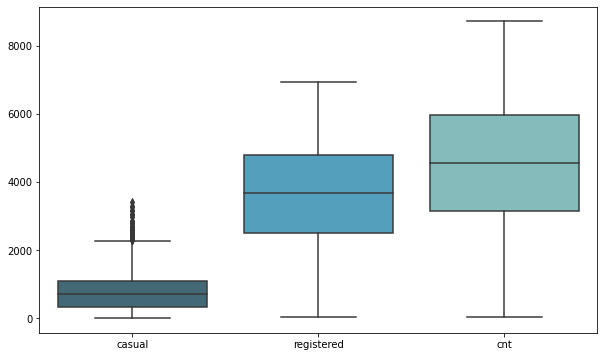

In [18]:
#boxplot
sns.boxplot(data=df[['casual', 'registered', 'cnt']], palette='GnBu_d')
fig1=plt.gcf()
fig1.set_size_inches(10,6)

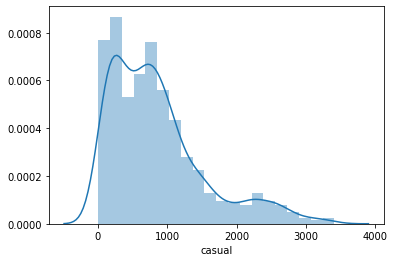

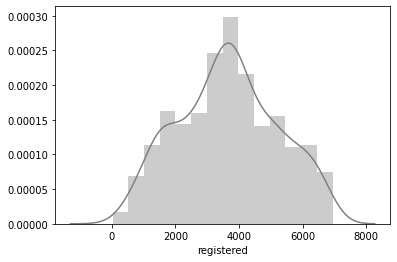

In [19]:
f, ax = plt.subplots()
sns.distplot(df['casual'])

f, ax = plt.subplots()
sns.distplot(df.registered, color='Grey');

A variável *casual* apresenta uma distribuição assimétrica à esquerda e possui outliers que serão removidos para análise mais assertiva.
Já o histograma da variável *registered* é uma distribuição normal e não será necessaria manipulação dos dados.

In [20]:
#droping outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.casual > 2000].index, axis=0, inplace=True)

#descriptive statistics
df_clean.casual.describe()

count     666.000000
mean      686.845345
std       461.994813
min         2.000000
25%       276.750000
50%       663.500000
75%       989.000000
max      1988.000000
Name: casual, dtype: float64

In [21]:
df.registered.describe()

count     731.000000
mean     3656.172367
std      1560.256377
min        20.000000
25%      2497.000000
50%      3662.000000
75%      4776.500000
max      6946.000000
Name: registered, dtype: float64

###Matriz de Correlação

Será utilizada a matriz de correlação para avaliar a força e a direção da relação entre dois itens ou variáveis. Valores de correlação altos e positivos indicam que os itens medem a mesma habilidade ou característica. Se os itens não estão altamente correlacionados, os itens podem medir diferentes características ou podem não estar claramente definidos. Os valores de correlação podem cair entre -1 e +1. Entretanto, na prática, os itens geralmente têm correlações positivas. Se os dois itens tendem a aumentar e diminuir juntos, o valor de correlação é positivo. 

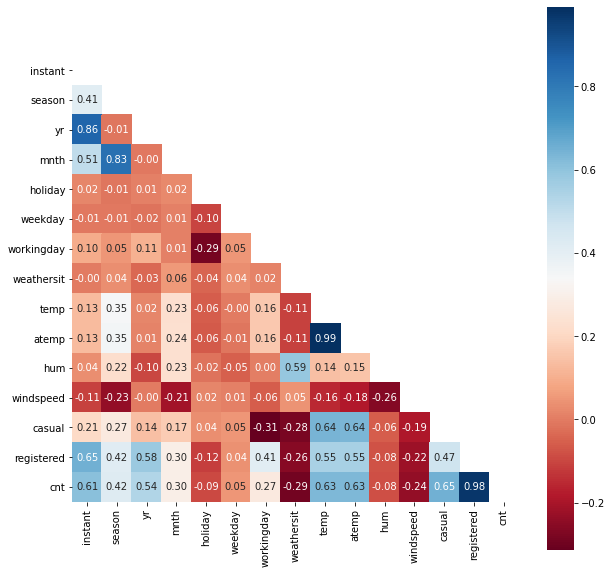

In [28]:
# correlation matrix
corr=df_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#plot heatmap
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)
plt.plot();

Observa-se que a maior correlação existente entre as variáveis são esperadas nas variáveis que tenham relação com o tempo e com a estação do ano. Também identifica-se uma relação positiva entre o número de pessoas que alugam as bicicletas e a temperatura do dia.

Também nota-se que há correlação negativa entre os alugueis casuais serem realizados em dias de trabalho.

##Modelo de machine learning

Para desenvolver o modelo de predição desse estudo, será utilizada a Regressão Linear pois a variável alvo é contínua.

In [29]:
#model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#X , y
X = df_clean['temp'].values.reshape(-1,1)
y = df_clean['cnt']

#train, test
X_train, X_test, y_train, y_test = train_test_split(X,y)

#create and train
rls_model = LinearRegression()
rls_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Por se tratar de um problema de baixa dimensionalidade, é possível plotar a reta obtida pelo modelo de Machine Learning sobre os dados do dataset. Veja como ela representa bem o conjunto de pontos.


Coeficiente:	 [6179.58796157]
Intercepto:	 1276.5281920771422


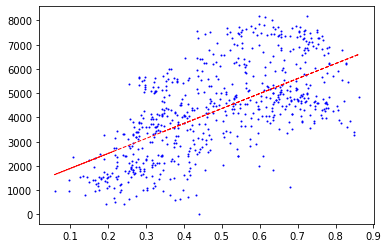

In [30]:
#coeficients
print("Coeficiente:\t", rls_model.coef_)
print("Intercepto:\t", rls_model.intercept_)

# plotar reta e dados
fig, ax = plt.subplots()
ax.scatter(X, y, s=1, color='blue')
ax.plot(X, (rls_model.coef_ * X + rls_model.intercept_), '--r', linewidth=1);

Com o modelo treinado, pode-se fazer previsões em cima de dados novos. Como separamos os dados de teste na variável y_test, as previsões serão realizadas usando o método predict() e armazenar na variável y_pred.

Um modelo de Machine Learning deve ser quantificável, seja em termos de desempenho ou precisão. No caso de modelos de Regressão, Vamos testar o desempenho do modelo em cima do conjunto de testes usando as métricas abaixo:


*   **R-Squared** - métrica popularmente usada
para calcular a acurácia do seu modelo. Basicamente, calcula como o seu modelo se encaixa aos seus dados, quantificando a qualidade entre 0 e 1. No caso, a melhor pontuação que seu modelo pode atingir é 1;
*   **Mean Absolut Error (MAE)** - é a média absoluta do erro, representada pela média das somas dos erros individuais (distâncias entre pontos e retas);
*   **Mean Squared Error (MSE)** - é a média dos quadrados dos error e provavelmente a métrica mais conhecida. Tende a penalizar exponencialmente os erros, tratando diferentemente erros pequenos e grandes.


In [31]:
# prediction
y_pred = rls_model.predict(X_test)

# evaluate model performance
print("R2 Score:\t", r2_score(y_test, y_pred))
print("MAE:\t\t", mean_absolute_error(y_test, y_pred))
print("MSE:\t\t", mean_squared_error(y_test, y_pred))

R2 Score:	 0.4092838501801703
MAE:		 1272.57063756667
MSE:		 2285867.5219938126
